In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
sns.set()

path = "C:/Users/User/Downloads/Technical test_DA 2023/Technical test_DA 2023/"
file_name = "TCB.xlsx"

In [26]:
df = pd.read_excel(path +file_name)
df
df.dtypes

Movie                      object
Release Date       datetime64[ns]
Critic 1                  float64
Critic 2                  float64
Critic 3                  float64
Critic 4                  float64
Critic 5                  float64
Audience Rating           float64
dtype: object

# Analytic

In [27]:
cols = df.columns.drop(['Movie', 'Release Date'])
df[cols] = df[cols].apply(pd.to_numeric)
df.dtypes

Movie                      object
Release Date       datetime64[ns]
Critic 1                  float64
Critic 2                  float64
Critic 3                  float64
Critic 4                  float64
Critic 5                  float64
Audience Rating           float64
dtype: object

For question 1, I compute the average critics rating for each film 

In [28]:
df['Average Critics Rating'] = df.iloc[:, 2:7].mean(axis='columns')
df.head()

,Movie,Release Date,Critic 1,Critic 2,Critic 3,Critic 4,Critic 5,Audience Rating,Average Critics Rating
0,Iron Man,2008-05-02,4.0,4.0,7.0,6.0,5.0,9.1,5.200000
1,The Incredible Hulk,2008-06-13,NaN,NaN,6.0,3.0,5.0,7.0,4.666667
2,Iron Man 2,2010-05-07,3.0,6.0,8.0,6.0,5.0,7.1,5.600000
3,Thor,2011-05-06,NaN,4.0,6.0,8.0,5.0,7.6,5.750000
4,Captain America: The First Avenger,2011-07-22,5.0,5.0,NaN,7.0,7.0,7.5,6.000000


For question 2, to begin with, I want to look at the data from an overall perspective.

In [29]:
df.describe()

,Critic 1,Critic 2,Critic 3,Critic 4,Critic 5,Audience Rating,Average Critics Rating
count,15.000000,18.000000,19.000000,17.000000,16.000000,22.000000,22.000000
mean,4.800000,6.555556,7.473684,7.058824,6.750000,8.186364,6.568939
std,1.656157,2.148111,1.389181,1.919329,2.081666,1.080254,1.325286
min,3.000000,3.000000,5.000000,3.000000,4.000000,4.500000,4.500000
25%,3.000000,5.000000,6.000000,6.000000,5.000000,7.650000,5.525000
50%,5.000000,6.500000,8.000000,7.000000,6.000000,8.550000,6.541667
75%,6.500000,8.000000,8.500000,9.000000,8.250000,8.975000,7.950000
max,7.000000,10.000000,10.000000,10.000000,10.000000,9.200000,9.000000


In [30]:
critic_list = df.iloc[:, 2:7].columns
print(critic_list)
critic_mean = df.iloc[:, 2:7].mean(axis=0)
print(critic_mean)

Index(['Critic 1', 'Critic 2', 'Critic 3', 'Critic 4', 'Critic 5'], dtype='object')
Critic 1    4.800000
Critic 2    6.555556
Critic 3    7.473684
Critic 4    7.058824
Critic 5    6.750000
dtype: float64


I decide to use Audience Rating mean, which is the red line, and Average Critic Rating mean, which is the green line, as 2 standards to categorize critics into there separated group. 

Group 1 is labeled Angle Critics, which consists of the critics having critic mean higher than the Audience Rating mean. As we can see from the chart below, there is no one belonging to this group.

Group 2 is labeled Friendly Critics, which consists of the critics having critic mean lower than the Audience Rating mean but higher than Average Critic Rating mean. There are 3 critics in this group which are Critic 3, Critic 4 and Critic 5.

Group 3 is labeled Harsh Critics, which consists of the critics having critic mean lower than Average Critic Rating mean. There are 2 critics in this group which are Critic 1 and Critic 2.

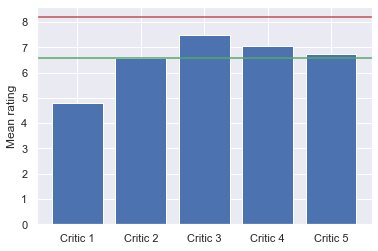

In [31]:
plt.bar(x=critic_list, height=critic_mean)
plt.ylabel("Mean rating")
plt.axhline(y=df['Audience Rating'].mean(), color='r')
plt.axhline(y=df['Average Critics Rating'].mean(), color='g')
plt.show()

Going further, I decide to catetogize at a deeper level within each group by calculating the frequency when one critic rates higher than the Average Critics Rating.

In [32]:
pass_average =[]
for i in range(1,6):
    pass_average.append(sum(df['Critic ' +str(i)] > df['Average Critics Rating']))
pass_average

[0, 9, 14, 9, 8]

In [33]:
rating_count = df.iloc[:, 2:7].count()
rating_count
percent_pass_average = [i/j * 100 for i,j in zip(pass_average, rating_count)]
percent_pass_average

[0.0, 50.0, 73.68421052631578, 52.94117647058824, 50.0]

I use 3 standard lines which are at 30%, 50% and 70%. Below 30% is negative. Around 50% is neutral. Above 70% is positive.

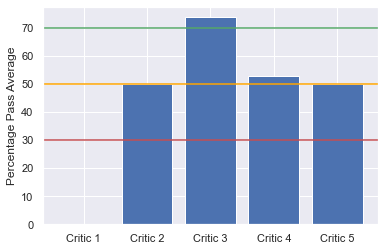

In [34]:
plt.bar(x=critic_list, height=percent_pass_average)
plt.ylabel("Percentage Pass Average")
plt.axhline(y=30, color='r')
plt.axhline(y=50, color='orange')
plt.axhline(y=70, color='g')
plt.show()

As we can see now from the chart, the ranking of the critics will identify their roles better within their group. To be more specific, in the Harsh Critic group, the percentage when Critic 1 rate higher than the Average Critics Rating is 0% which makes him/her the Extremely Harsh Critic. Similiarly, the Critic 2 has the percentage of rating higher than Average Critics Rating of 50%, which makes him/her the Moderately Harsh Critic. Furthermore, the Critic 3 in the Decent Critic group has the highest figure compared to the other two, which labels him/her as Significantly Friendly Critic. Similiarly, we can lablel Critic 4 and Critic 5 as Moderately Friendly Critic since their percentages are bigger than 50% and quite the same.

# Modelling

Normalize the values for the critics and transform values to z-scores

In [35]:
df.iloc[:, 2:7].cov()

,Critic 1,Critic 2,Critic 3,Critic 4,Critic 5
Critic 1,2.742857,2.000000,0.621795,1.527273,2.712121
Critic 2,2.000000,4.614379,-0.157143,1.236264,3.692308
Critic 3,0.621795,-0.157143,1.929825,0.692308,1.185897
Critic 4,1.527273,1.236264,0.692308,3.683824,1.931818
Critic 5,2.712121,3.692308,1.185897,1.931818,4.333333


In [21]:
df.iloc[:, 2:7] = (df.iloc[:, 2:7] - df.iloc[:, 2:7].mean(axis = 0))/np.std(df.iloc[:, 2:7])
df.iloc[:, 2:7].head()

,Critic 1,Critic 2,Critic 3,Critic 4,Critic 5
0,-0.500,-1.224166,-0.350325,-0.568642,-0.868243
1,NaN,NaN,-1.089899,-2.179793,-0.868243
2,-1.125,-0.266123,0.389249,-0.568642,-0.868243
3,NaN,-1.224166,-1.089899,0.505459,-0.868243
4,0.125,-0.745145,NaN,-0.031591,0.124035


Calculate the covariance matrix

In [23]:
df.iloc[:, 2:7].cov()

,Critic 1,Critic 2,Critic 3,Critic 4,Critic 5
Critic 1,1.071429,0.598777,0.287415,0.512639,0.840993
Critic 2,0.598777,1.058824,-0.055671,0.318040,0.877519
Critic 3,0.287415,-0.055671,1.055556,0.274977,0.435143
Critic 4,0.512639,0.318040,0.274977,1.062500,0.514736
Critic 5,0.840993,0.877519,0.435143,0.514736,1.066667


Linear regression + Random forest regression (feature importance)